<a href="https://colab.research.google.com/github/Asumah25/bulldozer-price-predict-api/blob/main/Asumah_Sulemana_bulldozer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine learning model
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Saving the trained model
import joblib

LOAD  DATA WITH PARSING DATE

In [ ]:
# Load the training dataset
# parse_dates ensures 'saledate' is treated as a datetime object


train_df = pd.read_csv(
    "Train.csv",
    parse_dates=["saledate"],
    low_memory=False
)


In [ ]:
train_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA INSPECTION

In [ ]:
train_df.shape

(24871, 53)

In [ ]:
# View column names
train_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

SORTING DATA BY SALEDATE

In [ ]:
# Sort data by sale date (time-series requirement)
train_df.sort_values('saledate', inplace=True)

FEATURE ENGINEERING FROM DATE COLUMN

In [ ]:

# Function to extract useful features from the sale date
def add_date_features(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    return df

# Apply feature engineering
train_df = add_date_features(train_df)

# Drop original datetime column
train_df.drop("saledate", axis=1, inplace=True)

In [ ]:
# Check dataset shape (rows, columns)
train_df.shape

(24871, 57)

In [ ]:
# View column names
train_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

In [ ]:
# Show first rows
train_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
24108,1250208,26000,1350192,6531,132,4,1978,NaN,NaN,350,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24159,1250324,31000,1502667,6788,132,4,1988,33.0,Low,580,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24716,1251795,19500,1156027,6788,132,4,1985,NaN,NaN,580,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24585,1251607,24000,1350795,6788,132,4,1987,254.0,Low,580,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24143,1250266,25000,1133319,6529,132,4,1984,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32


In [ ]:
# Show column names and data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   24871 non-null  int64  
 1   SalePrice                 24871 non-null  int64  
 2   MachineID                 24871 non-null  int64  
 3   ModelID                   24871 non-null  int64  
 4   datasource                24871 non-null  int64  
 5   auctioneerID              24871 non-null  int64  
 6   YearMade                  24871 non-null  int64  
 7   MachineHoursCurrentMeter  24001 non-null  float64
 8   UsageBand                 21075 non-null  object 
 9   fiModelDesc               24871 non-null  object 
 10  fiBaseModel               24871 non-null  object 
 11  fiSecondaryDesc           16320 non-null  object 
 12  fiModelSeries             3823 non-null   object 
 13  fiModelDescriptor         6134 non-null   object 
 14  Product

INSPECTING THE DATA TYPES FOR ALL THE COLUMNS

In [ ]:
train_df.dtypes

,0
SalesID,int64
SalePrice,int64
MachineID,int64
ModelID,int64
datasource,int64
auctioneerID,int64
YearMade,int64
MachineHoursCurrentMeter,float64
UsageBand,object
fiModelDesc,object


CONVERT STRING COLUMNS TO CATEGORY

In [ ]:
for col in train_df.select_dtypes(include="object").columns:
    train_df[col] = train_df[col].astype("category")



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   24871 non-null  int64   
 1   SalePrice                 24871 non-null  int64   
 2   MachineID                 24871 non-null  int64   
 3   ModelID                   24871 non-null  int64   
 4   datasource                24871 non-null  int64   
 5   auctioneerID              24871 non-null  int64   
 6   YearMade                  24871 non-null  int64   
 7   MachineHoursCurrentMeter  24001 non-null  float64 
 8   UsageBand                 21075 non-null  category
 9   fiModelDesc               24871 non-null  category
 10  fiBaseModel               24871 non-null  category
 11  fiSecondaryDesc           16320 non-null  category
 12  fiModelSeries             3823 non-null   category
 13  fiModelDescriptor         6134 non-null   categ

In [ ]:
train_df.dtypes

,0
SalesID,int64
SalePrice,int64
MachineID,int64
ModelID,int64
datasource,int64
auctioneerID,int64
YearMade,int64
MachineHoursCurrentMeter,float64
UsageBand,category
fiModelDesc,category


IDENTIFY MISSING VALUES(NaN)

In [ ]:
# Identify missing values in the dataset
train_df.isna().sum().sort_values(ascending=False).head(20)

,0
Blade_Width,23404
Enclosure_Type,23404
Tip_Control,23404
Scarifier,23404
Pushblock,23404
Blade_Extension,23404
Engine_Horsepower,23404
fiModelSeries,21048
Grouser_Tracks,20948
Hydraulics_Flow,20948


HANDLE MISSING VALUES

In [ ]:
#fill numerical mmissing values(Meadian)


for col in train_df.select_dtypes(include=["int64", "float64"]).columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())



In [ ]:
#handle categorical missing values
for col in train_df.select_dtypes(include="category").columns:
    train_df[col] = train_df[col].cat.add_categories("Missing").fillna("Missing")



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   24871 non-null  int64   
 1   SalePrice                 24871 non-null  int64   
 2   MachineID                 24871 non-null  int64   
 3   ModelID                   24871 non-null  int64   
 4   datasource                24871 non-null  int64   
 5   auctioneerID              24871 non-null  int64   
 6   YearMade                  24871 non-null  int64   
 7   MachineHoursCurrentMeter  24871 non-null  float64 
 8   UsageBand                 24871 non-null  category
 9   fiModelDesc               24871 non-null  category
 10  fiBaseModel               24871 non-null  category
 11  fiSecondaryDesc           24871 non-null  category
 12  fiModelSeries             24871 non-null  category
 13  fiModelDescriptor         24871 non-null  categ

In [ ]:
train_df.isna().sum() #missing values

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
fiModelDesc,0


In [ ]:
train_df[col]

,Steering_Controls
24108,Missing
24159,Missing
24716,Missing
24585,Missing
24143,Missing
...,...
23967,Conventional
23968,Missing
23970,Missing
23971,Conventional


In [ ]:
train_df[col]

,Steering_Controls
24108,Missing
24159,Missing
24716,Missing
24585,Missing
24143,Missing
...,...
23967,Conventional
23968,Missing
23970,Missing
23971,Conventional


In [ ]:
#columns that still have missing values

train_df.isna().sum()[train_df.isna().sum() > 0]

,0


SPLITTING

In [ ]:
#split features and target

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]


In [ ]:
#time series split based on train|validation split
X_train = X[train_df["saleYear"] < 2011]
X_valid = X[train_df["saleYear"] >= 2011]

y_train = y[train_df["saleYear"] < 2011]
y_valid = y[train_df["saleYear"] >= 2011]



In [ ]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
24108,1250208,1350192,6531,132,4,1978,2637.0,Missing,350,350,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24159,1250324,1502667,6788,132,4,1988,33.0,Low,580,580,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24716,1251795,1156027,6788,132,4,1985,2637.0,Missing,580,580,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24585,1251607,1350795,6788,132,4,1987,254.0,Low,580,580,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24143,1250266,1133319,6529,132,4,1984,2637.0,Missing,300,300,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1142920,111534,4149,121,3,1000,18069.0,Medium,D8N,D8,...,None or Unspecified,Semi U,Differential Steer,Missing,Missing,2010,12,23,3,357
8460,1167789,1041612,265,121,3,1997,0.0,Missing,D65PX-12,D65,...,None or Unspecified,None or Unspecified,None or Unspecified,Missing,Missing,2010,12,27,0,361
6174,1160096,153292,4141,121,3,1998,18563.0,High,D7R,D7,...,None or Unspecified,Semi U,Differential Steer,Missing,Missing,2010,12,28,1,362
20450,1210496,389669,3482,121,3,2006,1624.0,Low,318C,318,...,Missing,Missing,Missing,Missing,Missing,2010,12,28,1,362


In [ ]:
X_valid.dtypes[X_valid.dtypes == "object"]

,0


ENCODE CATEGORICAL FEATURES

In [ ]:
for col in train_df.select_dtypes(include="category").columns:
    train_df[col] = train_df[col].cat.codes


In [ ]:
train_df.shape

(24871, 57)

TRAIN RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

# Features and target
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# Split: 80% train, 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

# Fit
model.fit(X_train, y_train)

# Score on validation set
model.score(X_valid, y_valid)


0.8161444219830626

1 . BUILDING AND EVALUATION FUNCTION TO CALCULATE AND RETURNS MULTIPLE METRICS(rmse,mae,r2 and rmsle)

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Function to evaluate a trained model on validation data
def evaluate_model(model, X_valid, y_valid):

    # Generate predictions from the model
    preds = model.predict(X_valid)


    preds = np.maximum(preds, 0)

    # Metrics
    rmsle = np.sqrt(mean_squared_log_error(y_valid, preds))
    mae = mean_absolute_error(y_valid, preds)
    r2 = r2_score(y_valid, preds)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))

    # Return dictionary of metrics
    return {
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "rmsle": rmsle
    }


In [ ]:
evaluate_model(model, X_valid, y_valid)


{'rmse': np.float64(10418.174927015825),
 'mae': 6958.210518768909,
 'r2': 0.8161444219830626,
 'rmsle': np.float64(0.3064246357394086)}

BASELINE MODEL

In [ ]:
# Baseline model

baseline_model = RandomForestRegressor(
    n_estimators=30,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

baseline_model.fit(X_train, y_train)

# Evaluate baseline
baseline_scores = evaluate_model(baseline_model, X_valid, y_valid)
print("Baseline scores:", baseline_scores)


Baseline scores: {'rmse': np.float64(10875.519766075326), 'mae': 7277.433180204585, 'r2': 0.7996480543869102, 'rmsle': np.float64(0.3194652207692063)}


HYPERPARAMETER TUNING

In [ ]:
# hyperparameter options for tuning the random forest


rf_grid = {
    "n_estimators": [30, 50, 80],
    "max_depth": [10, 15, 20],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
    "max_features": ["sqrt"]
}

rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ),
    rf_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

rs_model.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; 

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [10, 15, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [30, 50, 80]},
                   random_state=42, verbose=2)

In [ ]:
print("Best parameters:", rs_model.best_params_)



OPTIMAL MODEL TRAINING

In [ ]:

best_params = rs_model.best_params_
print("Best Parameters:", best_params)






Best Parameters: {'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
#Safety cap to prevent giant models
safe_params = best_params.copy()

safe_params["n_estimators"] = min(safe_params.get("n_estimators", 50), 80)
safe_params["max_depth"] = min(safe_params.get("max_depth", 20), 20)
safe_params["min_samples_leaf"] = max(safe_params.get("min_samples_leaf", 10), 5)
safe_params["min_samples_split"] = max(safe_params.get("min_samples_split", 5), 5)
safe_params["max_features"] = "sqrt"

final_model = RandomForestRegressor(
    **safe_params,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

final_scores = evaluate_model(final_model, X_valid, y_valid)
print("Final Model Scores (RMSLE, MAE, R²):", final_scores)


Final Model Scores (RMSLE, MAE, R²): {'rmse': np.float64(9762.076245378754), 'mae': 6450.600300101027, 'r2': 0.8385723551126866, 'rmsle': np.float64(0.2879431774936866)}


SCORE COMPARISON (BASELINE SCORE VS FINAL MODELSCORES)

In [ ]:
# Get the best model from the randomized search
final_model = rs_model.best_estimator_

# Evaluate the tuned model
final_scores = evaluate_model(final_model, X_valid, y_valid)

# Compare baseline vs final model scores
baseline_scores, final_scores



({'rmse': np.float64(10875.519766075326),
  'mae': 7277.433180204585,
  'r2': 0.7996480543869102,
  'rmsle': np.float64(0.3194652207692063)},
 {'rmse': np.float64(9762.076245378754),
  'mae': 6450.600300101028,
  'r2': 0.8385723551126866,
  'rmsle': np.float64(0.2879431774936866)})

GRAPH

SAVE THE MODEL

In [ ]:
joblib.dump(final_model, "bulldozer_price_model.joblib")


['bulldozer_price_model.joblib']

TESTING AND ANALYSIS

In [ ]:
# Load test data
test_df = pd.read_csv("Test.csv", parse_dates=["saledate"], low_memory=False)

# Feature engineering
test_df["saleYear"] = test_df["saledate"].dt.year
test_df["saleMonth"] = test_df["saledate"].dt.month
test_df["saleDay"] = test_df["saledate"].dt.day
test_df["saleDayOfWeek"] = test_df["saledate"].dt.dayofweek
test_df["saleDayOfYear"] = test_df["saledate"].dt.dayofyear

# Drop unused columns AFTER feature creation
test_df = test_df.drop(["saledate", "SalePrice"], axis=1, errors="ignore")



In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 1834 non-null   object 
 8   fiModelDesc               12457 non-null  object 
 9   fiBaseModel               12457 non-null  object 
 10  fiSecondaryDesc           8482 non-null   object 
 11  fiModelSeries             2006 non-null   object 
 12  fiModelDescriptor         3024 non-null   object 
 13  ProductSize               6048 non-null   object 
 14  fiProd

CONVERT STRING TO  CATEGORY

In [ ]:
for col in test_df.select_dtypes(include="object").columns:
    test_df[col] = test_df[col].astype("category")


In [ ]:
test_df.dtypes

,0
SalesID,int64
MachineID,int64
ModelID,int64
datasource,int64
auctioneerID,int64
YearMade,int64
MachineHoursCurrentMeter,float64
UsageBand,category
fiModelDesc,category
fiBaseModel,category


HANDLE NUMERICAL MISSING VALUES

In [ ]:
for col in test_df.select_dtypes(include=["int64", "float64"]).columns:
    test_df[col] = test_df[col].fillna(train_df[col].median())


In [ ]:
test_df.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,10623
fiModelDesc,0
fiBaseModel,0


HANDLE CATEGORICAL MISSING VALUES

In [ ]:
for col in test_df.select_dtypes(include="category").columns:
    test_df[col] = test_df[col].cat.add_categories("Missing").fillna("Missing")


In [ ]:
test_df.isna().sum()



,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
fiModelDesc,0
fiBaseModel,0


In [ ]:
test_df[col]

,Steering_Controls
0,Missing
1,Conventional
2,Missing
3,Missing
4,Missing
...,...
12452,Missing
12453,Missing
12454,Missing
12455,Missing


ENCODE CATEGORICAL VARIABLES

In [ ]:
for col in test_df.select_dtypes(include="category").columns:
    test_df[col] = test_df[col].cat.codes


In [ ]:
# preDict on the test data
test_df = test_df.drop("SalePrice", axis=1, errors="ignore")

# predict directly (no expm1)
test_preds = final_model.predict(test_df)

# build prediction dataframe
test_predictions = pd.DataFrame({
    "SalesID": test_df.index,
    "SalePrice": test_preds
})

test_predictions.head()

,SalesID,SalePrice
0,0,23706.654646
1,1,33759.022456
2,2,61629.413139
3,3,62344.454983
4,4,37885.786940


LOAD THE SAVED MODEL

In [ ]:
import joblib
# Load the model saved
model = joblib.load("bulldozer_price_model.joblib")


In [ ]:
test_df = test_df[X_train.columns]


In [ ]:
#make predictions on test data

test_predictions = model.predict(test_df)



In [ ]:
# ouput
test_predictions[:10]


array([23706.654646  , 33759.02245595, 61629.41313853, 62344.45498269,
       37885.78693985, 34473.3483494 , 31828.92046622, 23971.21437005,
       23417.72177059, 43690.126803  ])

In [ ]:
pred_df = pd.DataFrame({
    "Prediction": test_predictions
})

pred_df.to_csv("test_predictions.csv", index=False)


CUSTOM PREDICTION

In [ ]:
sample = X_train.iloc[[0]]
sample_log_pred = final_model.predict(sample)
np.expm1(sample_log_pred)

/tmp/ipython-input-1410852746.py:3: RuntimeWarning: overflow encountered in expm1
  np.expm1(sample_log_pred)


array([inf])

In [ ]:
# take one sample from the training data
sample = X_train.iloc[[0]]

# predict the sale price directly (model outputs real prices)
sample_pred = final_model.predict(sample)

sample_pred


array([21783.10702175])

FEATURE IMPORTANCE

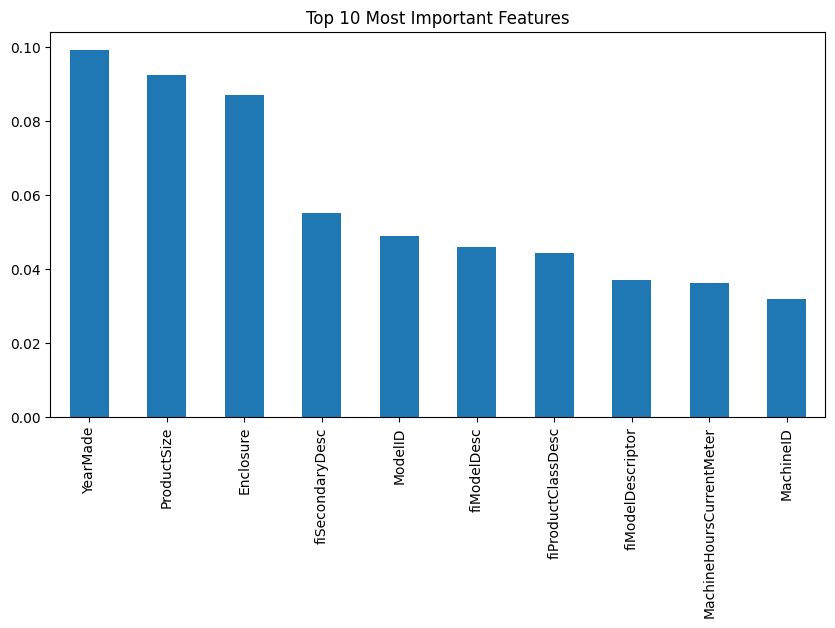

In [ ]:
feature_importance = pd.Series(
    final_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance[:5].plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Most Important Features")
plt.show()